In [1]:
import numpy as np
import dask , dask.distributed
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cmocean.cm as cmo
import warnings
warnings.simplefilter('ignore')
import dask_jobqueue
from astropy.convolution import Box2DKernel, convolve
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator, LongitudeLocator)
import matplotlib.colors as colors
import pandas as pd
from fix_grid import fix_grid

In this notebook exemplary snapshots of various variables were plotted. Since this is a very old notebook, file paths were not updated and the anomalies were calculated with a mean filter and not with a median filter.

In [4]:
pathf='/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/0181/'
dsa=xr.open_dataset(pathf+'3x3_boxfilter_anomaly_daily.nc', chunks={"xt_ocean": 10, "yt_ocean":10})

In [5]:
correlations=xr.open_dataset('/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/0181/3x3_boxfilter_ssh_correlations_daily.nc')

In [6]:
dsa=fix_grid(dsa)
correlations=fix_grid(correlations)

In [ ]:
### global correlation

In [ ]:
fig, axs= plt.subplots(nrows=1, ncols=3 , figsize=(18,3),subplot_kw={'projection': ccrs.PlateCarree()})
im=correlations.corr_ssh_sst.plot(ax=axs[0], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(),
                              add_colorbar=False)
correlations.corr_ssh_o2.plot(ax=axs[1], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(),
                             add_colorbar=False)
correlations.corr_ssh_dic.plot(ax=axs[2], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(),
                              add_colorbar=False)

for i in range(3):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0)
    gl.xlabels_top = False
    gl.ylabels_left = False

axs[0].set_title('Corr SSH-SST');
axs[1].set_title('Corr SSH-O2');
axs[2].set_title('Corr SSH-DIC');

cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.05])  # Left, bottom, width, height.
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_global_corr_daily.png', bbox_inches="tight", dpi=300)

In [ ]:
## agulhas region

In [ ]:
ds_agulhas=correlations.sel(xt_ocean=slice(0,50), yt_ocean=slice(-45,-30))

In [ ]:
fig, axs= plt.subplots(nrows=1, ncols=3 , figsize=(18,2.5),subplot_kw={'projection': ccrs.PlateCarree()})
im=ds_agulhas.corr_ssh_sst.plot(ax=axs[0], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(),
                              add_colorbar=False)
ds_agulhas.corr_ssh_o2.plot(ax=axs[1], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(),
                             add_colorbar=False)
ds_agulhas.corr_ssh_dic.plot(ax=axs[2], vmin=-1, vmax=1, cmap=cmo.balance, transform = ccrs.PlateCarree(),
                              add_colorbar=False)

for i in range(3):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0)
    gl.xlabels_top = False
    gl.ylabels_left = False

axs[0].set_title('Corr SSH-SST');
axs[1].set_title('Corr SSH-O2');
axs[2].set_title('Corr SSH-DIC');

cbar_ax = fig.add_axes([0.2, 0.0, 0.6, 0.05])  # Left, bottom, width, height.
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')

plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_agulhas_corr_daily.png', bbox_inches="tight", dpi=300)

In [ ]:
### global anomalies example day

In [ ]:
fig, axs= plt.subplots(nrows=2, ncols=2 , figsize=(15,7),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
dsa.isel(time=0).SSH.plot(ax=axs[0], vmin=-.2, vmax=.2, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=True)
dsa.isel(time=0).SST.plot(ax=axs[1], vmin=-2, vmax=2, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=True)
dsa.isel(time=0).dic_stf.plot(ax=axs[2], vmin=-2, vmax=2, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=True)
dsa.isel(time=0).o2_stf.plot(ax=axs[3], vmin=-8, vmax=8, cmap=cmo.balance, transform = ccrs.PlateCarree(), add_colorbar=True)

for i in range(4):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0)
    gl.xlabels_top = False
    gl.ylabels_right = False


axs[0].set_title('SSH [m]');
axs[1].set_title('SST [°C]');
axs[2].set_title('DIC [mole/m^2*yr]');
axs[3].set_title('O2 [mole/m^2*yr]');

plt.subplots_adjust(hspace=0.02, wspace=0.1)
plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_global_ano_day1.png', bbox_inches="tight", dpi=300)

In [ ]:
#### agulhas anomalies example day

In [7]:
agday0=dsa.isel(time=0).sel(xt_ocean=slice(0,50), yt_ocean=slice(-45,-30))

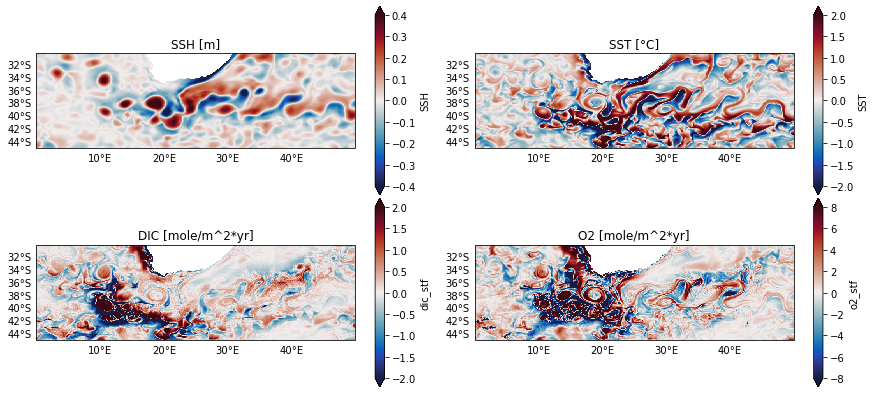

In [8]:
fig, axs= plt.subplots(nrows=2, ncols=2 , figsize=(15,7),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()

agday0.SSH.plot(ax=axs[0], vmin=-0.4, vmax=0.4, cmap=cmo.balance, transform = ccrs.PlateCarree())
agday0.SST.plot(ax=axs[1], vmin=-2, vmax=2, cmap=cmo.balance, transform = ccrs.PlateCarree())
agday0.dic_stf.plot(ax=axs[2],vmin=-2, vmax=2, cmap=cmo.balance, transform = ccrs.PlateCarree())
agday0.o2_stf.plot(ax=axs[3],vmin=-8, vmax=8, cmap=cmo.balance, transform = ccrs.PlateCarree());

for i in range(4):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0)
    gl.xlabels_top = False
    gl.ylabels_right = False

axs[0].set_title('SSH [m]');
axs[1].set_title('SST [°C]');
axs[2].set_title('DIC [mole/m^2*yr]');
axs[3].set_title('O2 [mole/m^2*yr]');
plt.subplots_adjust(hspace=0.02, wspace=0.1)
#plt.savefig('/gxfs_home/geomar/smomw577/plots/Boxcar/correlations/3x3_boxcar_agulhas_ano_day1.png', bbox_inches="tight", dpi=300)

In [9]:
### exemplary for showing that the box filter works

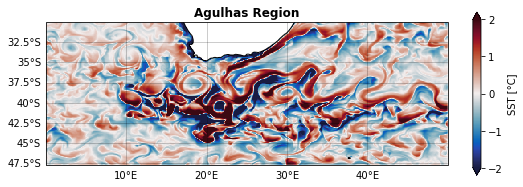

In [11]:
fig, axs= plt.subplots(nrows=1, ncols=1 , figsize=(9,3),subplot_kw={'projection': ccrs.PlateCarree()})
axs.set_extent([0, 50, -45, -30])

dsa.SST.isel(time=2).plot(ax=axs, vmin=-2, vmax=2, cmap=cmo.balance, transform = ccrs.PlateCarree(),cbar_kwargs={'label': "SST [°C]"})
gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0.2)
#axs.add_feature(ccrs.cartopy.feature.COASTLINE)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
axs.coastlines()
axs.set_title('Agulhas Region', fontweight='bold')
pathp='/gxfs_home/geomar/smomw577/plots/Boxcar/0181-0190/'
plt.savefig(pathp+'exemplary_daily.png', dpi=300, bbox_inches='tight')